In [1]:
import cv2
import numpy as np

### np.full

**_np.full_** è una funzione che permette di creare un nuovo NumPy array, che rappresenta la nuova immagine. Si devono specificare tre parametri:

1. shape dell'array, cioè la dimensione dell'immagine
2. valore iniziare per ogni pixel. 255 è bianco, 0 è nero
3. tipo di ciascun pixel (_np.uint8_, _np.float32_, _np.double64_)

In [2]:
# Creiamo un'immagine 480x640x3 in cui:
# 480 è il numero di righe e altezza dell'immagine
# 640 è il numero di colonne e larghezza dell'immagine
# 3 indica il numero di canali, ovvero il fatto che l'immagine è a colori

img = np.full((480, 640, 3), 255, np.uint8)
cv2.imshow('white', img)
cv2.waitKey()
cv2.destroyAllWindows()

### N.B.

OpenCv rappresenta i canali, per motivi storici, come **BGR** non **RGB**. Per questo motivo quando si specifica il valore del colore, il primo è il valore del blu, il secondo il valore del verde, il terzo quello del rosso.

In [3]:
img = np.full((480, 640, 3), (0, 0, 255), np.uint8)
cv2.imshow('red', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
img_g = np.full((480, 640, 3), (0, 255, 0), np.uint8)
cv2.imshow('green', img_g)
cv2.waitKey()
cv2.destroyAllWindows()

### np.fill

**_np.fill_** è una funzione che permette di assegnare lo stesso valore a tutti i pixel, la differenza con **_np.full_** è che in questo caso non si crea una nuova immagine, ma questa deve già esistere.

In [5]:
img.fill(0)
cv2.imshow('black', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# Impostare alcuni pixel a valori prefissati

img[240, 160] = img[240, 320] = img[240, 480] = (255, 255, 255)
cv2.imshow('black and white', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# Una linea bianca lungo tutta l'immagine

img[: , 320, :] = 255
cv2.imshow('black and white', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# Tutti i pixel di un canale a 255 in una certa regione dell'immagine

img[100:600, 100:300, 2] = 255
cv2.imshow('black and white', img)
cv2.waitKey()
cv2.destroyAllWindows()

## Convertire in differenti formati di dati e scalare i valori di un'immagine

In [9]:
image = cv2.imread('./Lena.png')
print(image.shape)
print(image.dtype)
cv2.imshow('Lena', image)
cv2.waitKey()
cv2.destroyAllWindows()

(512, 512, 3)
uint8


In [10]:
image = image.astype(np.float32) / 255
print(image.shape)
print(image.dtype)

(512, 512, 3)
float32


In [11]:
# Scambia valori del canale blu con quello del rosso

image[:, :, [0, 2]] = image[:, :, [2, 0]]
image = (image*255).astype(np.uint8)
cv2.imshow('blue_swapped', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
image = image.astype(np.float32) / 255
image[:, :, [2, 0]] = image[:, :, [0, 2]]
image[:, :, 0] = (image[:, :, 0] * 0.9).clip(0, 1)
image[:, :, 1] = (image[:, :, 1] * 1.1).clip(0, 1)

image = (image*255).astype(np.uint8)
cv2.imshow('orig', image)
cv2.waitKey()
cv2.destroyAllWindows()

## Convertire in scala dei grigi un'immagine a colori

In [13]:
image = cv2.imread('./Lena.png').astype(np.float32) / 255
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = (gray*255).astype(np.uint8)
cv2.imshow('gray', gray)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# un modo per leggerla già in scala dei grigi

grey = cv2.imread('Lena.png', 0)
cv2.imshow('grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

## Normalizzazione di un'immagine

In [15]:
image = cv2.imread('./Lena.png').astype(np.float32) / 255

image -= image.mean()
image /= image.std()

## Istogramma 

In [16]:
import matplotlib.pyplot as plt

grey = cv2.imread('Lena.png', 0)
cv2.imshow('grey', grey)
cv2.waitKey()
cv2.destroyAllWindows()

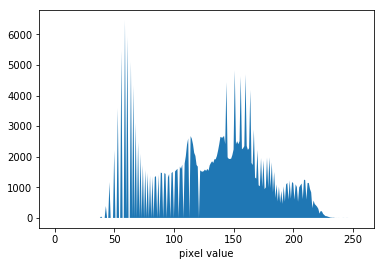

In [17]:
hist, bins = np.histogram(grey, 256, [0,255])

plt.fill(hist)
plt.xlabel('pixel value')
plt.show()

## Rimozione del rumore in immagine

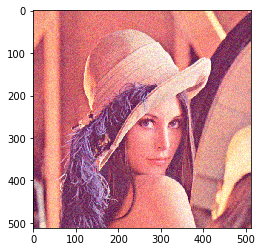

In [18]:
image = cv2.imread('Lena.png').astype(np.float32)/255

# si genera del rumore distorcendo il valore di certi pixel in modo random

noised = (image + 0.2 * np.random.rand(*image.shape).astype(np.float32))
noised = noised.clip(0, 1)
plt.imshow(noised[:,:,[2,1,0]])
plt.show()

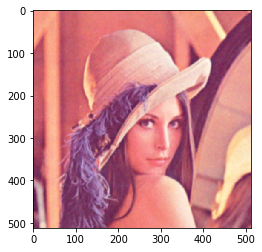

In [19]:
# applichiamo il filtro di gauss all'immagine

gauss_blur = cv2.GaussianBlur(noised, (7,7), 0)
plt.imshow(gauss_blur[:,:,[2,1,0]])
plt.show()

## Gradiente dell'immagine attraverso l'utilizzo del filtro di Sobel

(512, 512)
(512, 512)


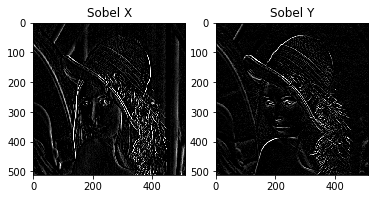

In [20]:
img_gray = cv2.imread('Lena.png', 0)

img_sobel_x=cv2.Sobel(img_gray,-1,1,0) 
img_sobel_y=cv2.Sobel(img_gray,-1,0,1) 
print(img_sobel_x.shape)
print(img_sobel_y.shape)

plt.subplot(1,2,1)
plt.imshow(img_sobel_x[...,::-1],cmap='gray')
plt.title('Sobel X')
plt.subplot(1,2,2)
plt.imshow(img_sobel_y[...,::-1],cmap='gray')
plt.title('Sobel Y')
plt.show()

## Binarizzazione di un'immagine 

In [21]:
image = cv2.imread('./Lena.png', 0)

thr, mask = cv2.threshold(image, 200, 1, cv2.THRESH_BINARY)
print('Threshold used: ', thr)

Threshold used:  200.0


In [23]:
adapt_mask = cv2.adaptiveThreshold(image ,255 ,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11 ,10)

TypeError: unhashable type: 'numpy.ndarray'

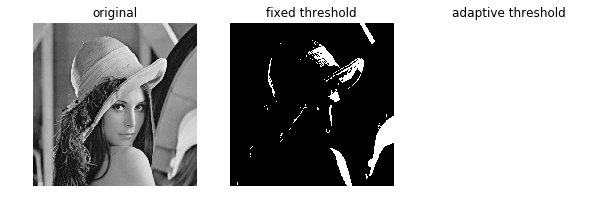

In [24]:
plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('fixed threshold')
plt.imshow(mask, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('adaptive threshold')
plt.subplot(adapt_mask, cmap='gray')

plt.tight_layout()
plt.show()

## Operazioni morfologiche

**erosione** e 
**dilatazione**

In [25]:
image = cv2.imread('./Lena.png', 0)

_, binary = cv2.threshold(image, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


In [26]:
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3, 3), iterations=10)
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3, 3), iterations=10)

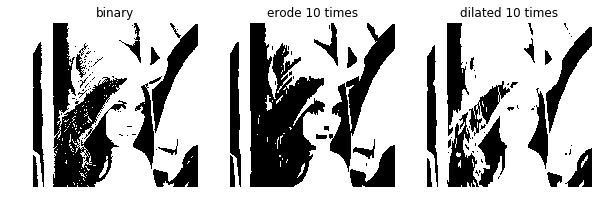

In [27]:
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.axis('off')
plt.title('binary')
plt.imshow(binary, cmap='gray')

plt.subplot(132)
plt.axis('off')
plt.title('erode 10 times')
plt.imshow(eroded, cmap='gray')

plt.subplot(133)
plt.axis('off')
plt.title('dilated 10 times')
plt.imshow(dilated, cmap='gray')

plt.show()
